In [5]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

##### For Preprocessing #####
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

##### For Building the Model #####
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline

##### For Validation of the Model #####
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

In [6]:
sale=pd.read_csv(r'C:\Users\HP\Downloads\advertising.csv')

In [7]:
sale.shape

(200, 4)

In [8]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
sale.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
sale.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_5908\1674980885.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(sale.corr(), dtype=np.bool)


<Axes: >

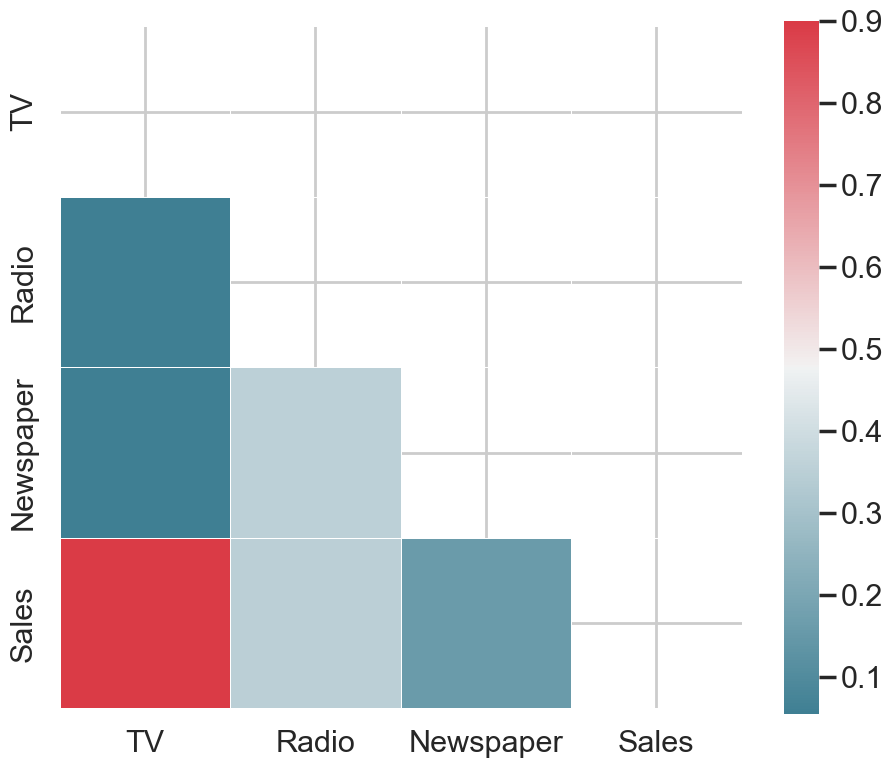

In [11]:

# Generate a mask for the upper triangle
mask = np.zeros_like(sale.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(sale.corr(), mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax)

Text(0.5, 1.0, 'Sales vs Radio')

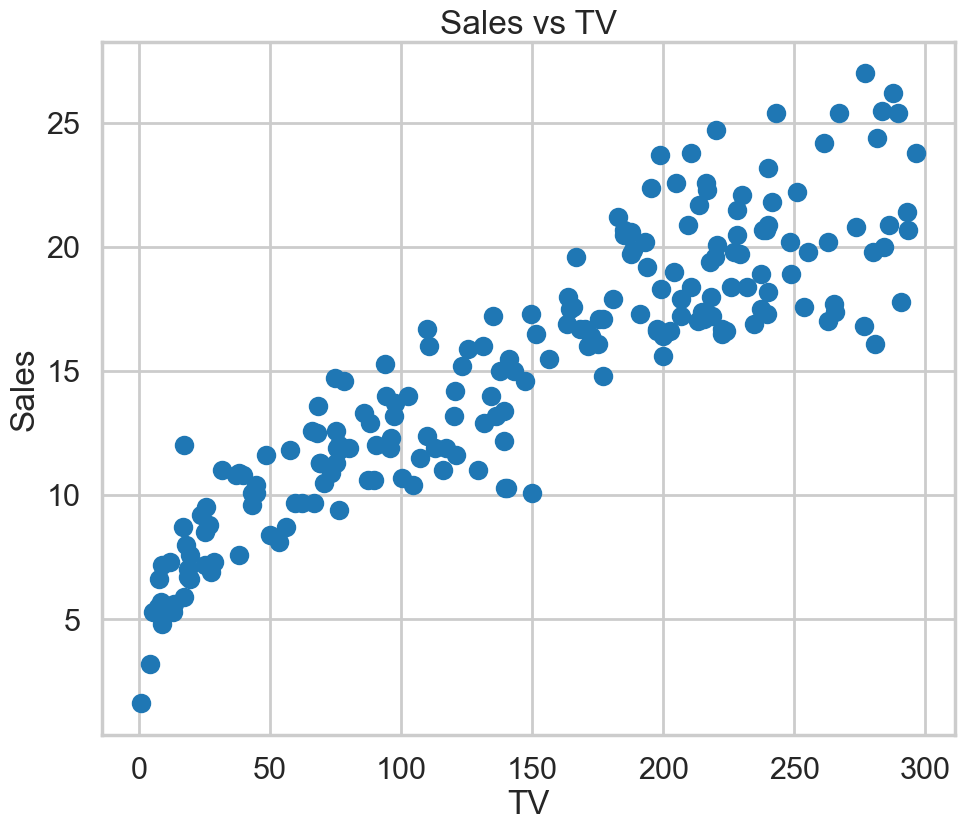

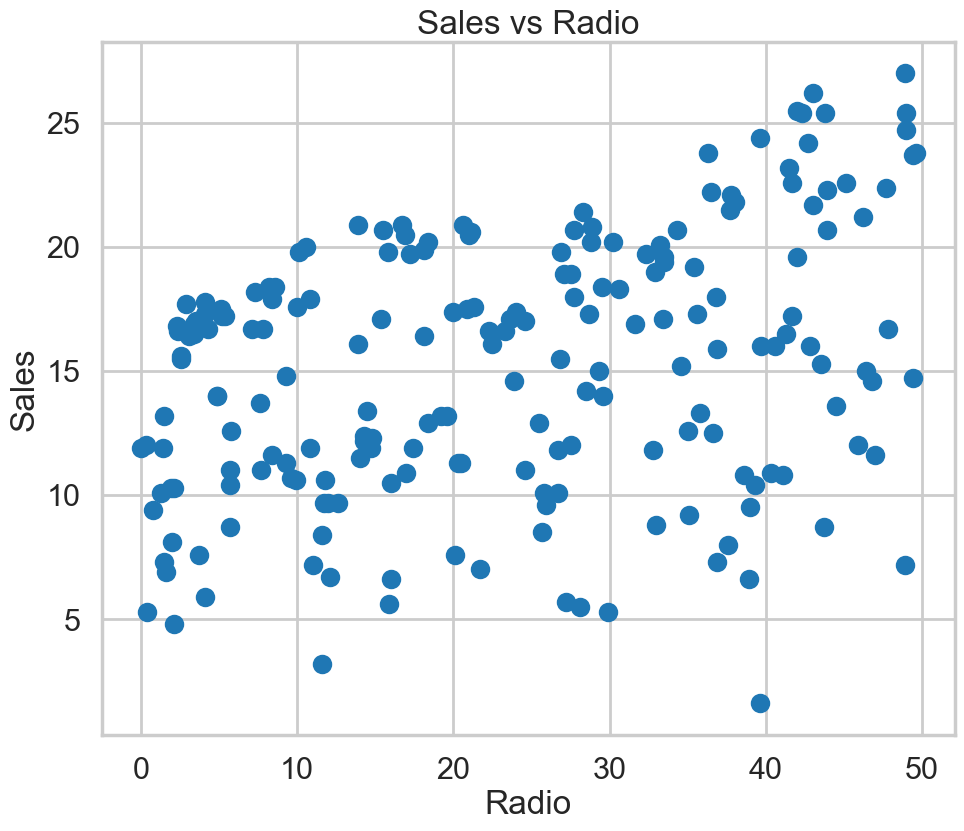

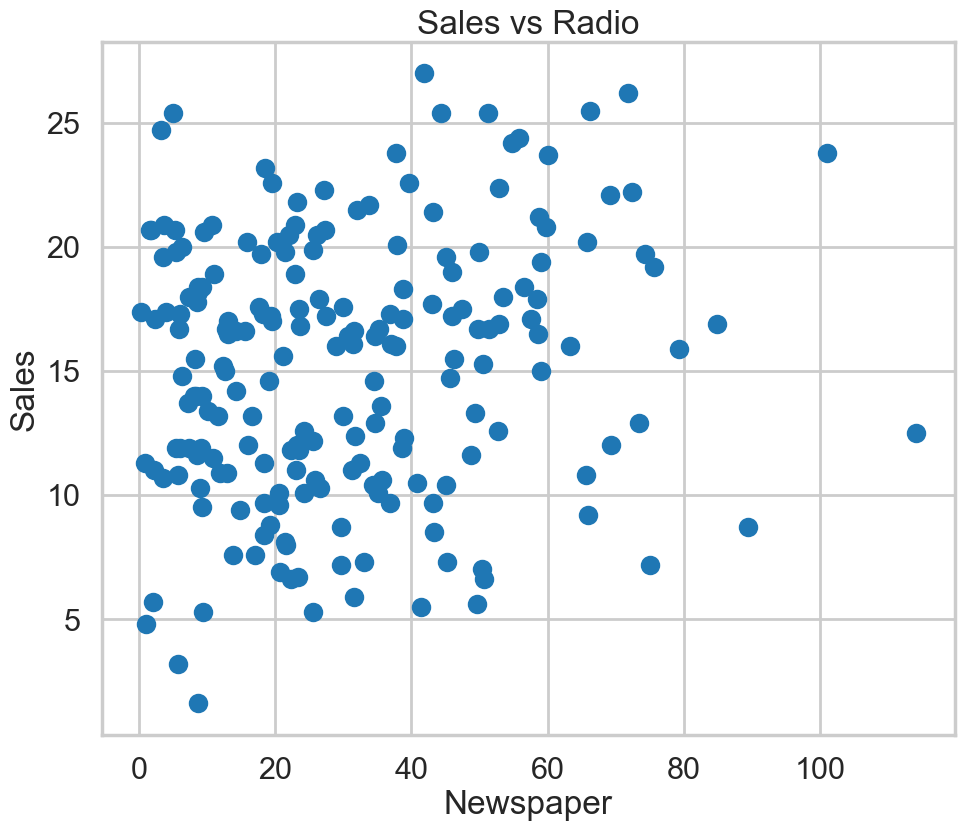

In [12]:
f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(sale["TV"], sale["Sales"])
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Sales vs TV")

f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(sale["Radio"], sale["Sales"])
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title("Sales vs Radio")

f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(sale["Newspaper"], sale["Sales"])
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title("Sales vs Radio")

Text(0.5, 1.0, 'Radio vs Radio')

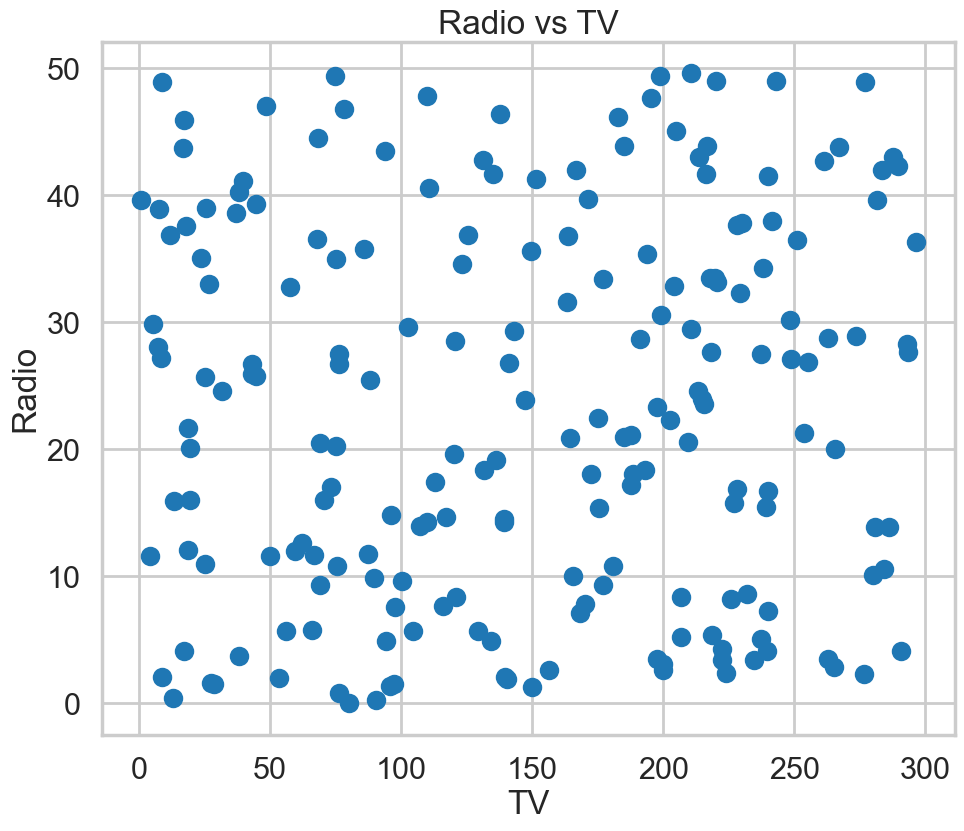

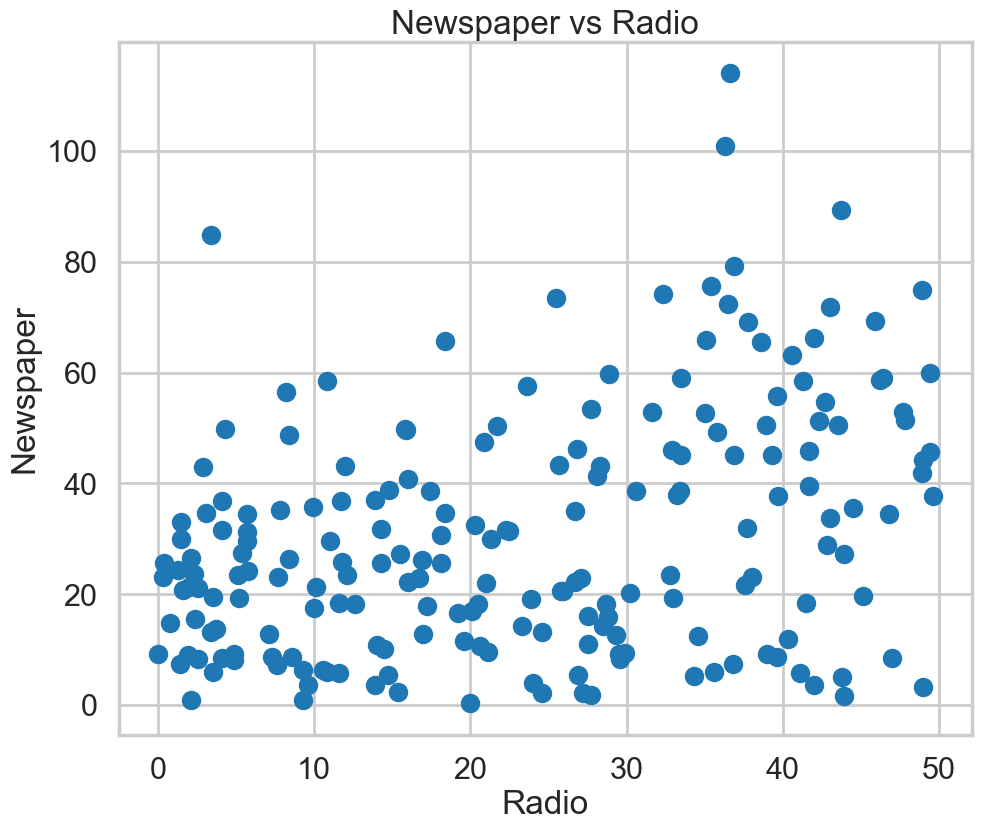

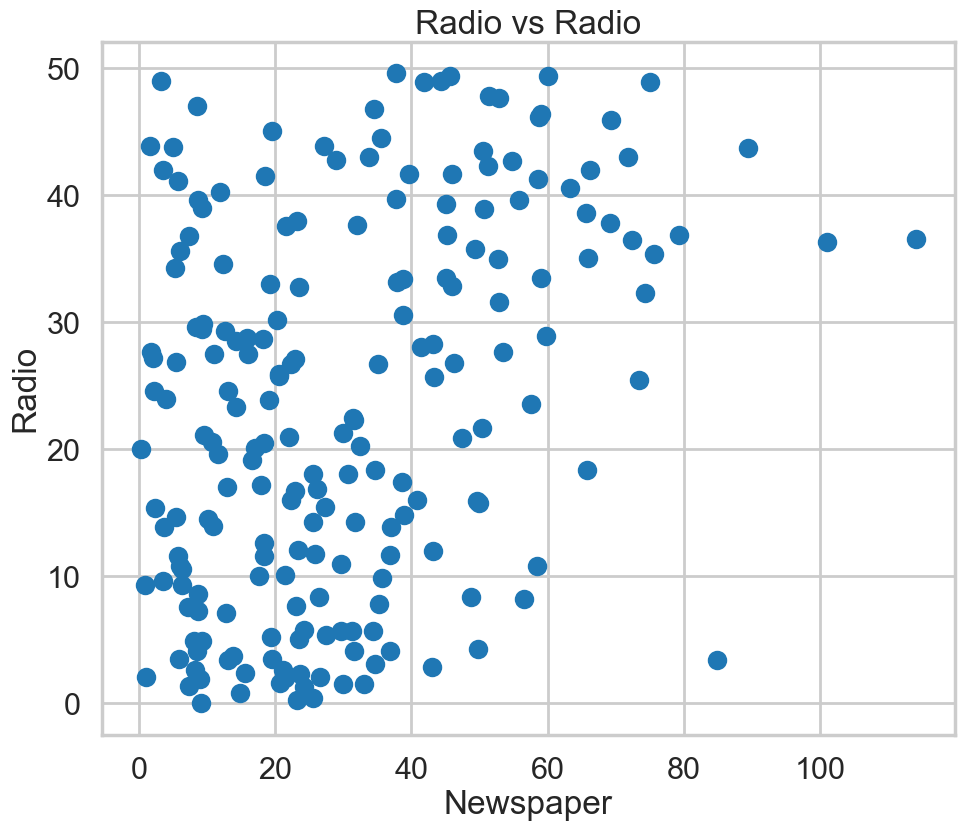

In [13]:

f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(sale["TV"], sale["Radio"])
plt.xlabel("TV")
plt.ylabel("Radio")
plt.title("Radio vs TV")

f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(sale["Radio"], sale["Newspaper"])
plt.xlabel("Radio")
plt.ylabel("Newspaper")
plt.title("Newspaper vs Radio")

f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(sale["Newspaper"], sale["Radio"])
plt.xlabel("Newspaper")
plt.ylabel("Radio")
plt.title("Radio vs Radio")


In [14]:
x = sale.drop("Sales", axis = 1)
y = sale["Sales"]

print(f"==x (predictors)==\nSize: {x.shape}\n{x.head()}\n Data Type: {type(x.head())} ")
print(f"\n==y (target)==\nSize: {y.shape}\n{y.head()}\n{type(y.head())}")

==x (predictors)==
Size: (200, 3)
      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4
 Data Type: <class 'pandas.core.frame.DataFrame'> 

==y (target)==
Size: (200,)
0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64
<class 'pandas.core.series.Series'>


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)
print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("\nx_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (150, 3)
y_train size: (150,)

x_test size: (50, 3)
y_test size: (50,)


In [17]:
def linreg_model(xtrain, xtest):
    ### Initialize algorithm
    linreg = LinearRegression()

    ### Fit the data
    linreg.fit(xtrain, y_train)
    
    ### Evaluate the model
    y_pred = linreg.predict(xtest)
    
    print("R2:", r2_score(y_pred, y_test))
    print("MAE:", mean_absolute_error(y_pred, y_test))
    print("MSE:", mean_squared_error(y_pred, y_test))
    print("RMSE:", np.sqrt(mean_squared_error(y_pred, y_test)))
    
    f, ax = plt.subplots(figsize=(11, 9))
    plt.scatter(y_pred, y_test)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Actual vs Predicted")
    
    return {"R2": r2_score(y_pred, y_test) * 100, "MAE": mean_absolute_error(y_pred, y_test), 
            "MSE": mean_squared_error(y_pred, y_test), "RMSE": np.sqrt(mean_squared_error(y_pred, y_test))}


R2: 0.90514835876105
MAE: 1.1199940713361767
MSE: 2.4040674447118864
RMSE: 1.550505544882664
Cross-Val Results: [0.89391193 0.84835255 0.91336339 0.93740449 0.90972209 0.92995146
 0.85494586 0.83727721 0.86267846 0.927566  ]
Cross-Val Mean: 0.8915173447734139


NameError: name 'df_results' is not defined

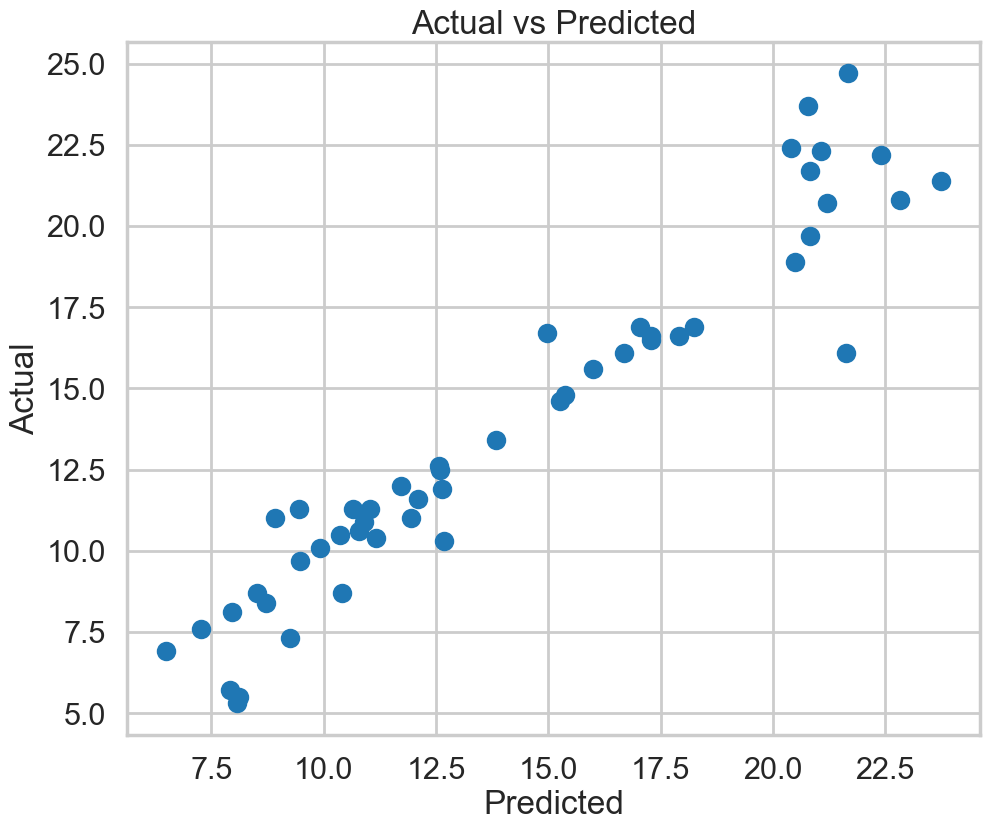

In [27]:
linreg_all_results = linreg_model(x_train, x_test)

### Cross Validation
cv_score = cross_val_score(LinearRegression(), x, y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

### Compile validation results
linreg_all_results.update({"Predictor/s":"All", "Cross-Val Mean": cv_score.mean() * 100})

### Add the results to the dataframe
df_results = df_results.append(linreg_all_results, ignore_index=True)

R2: 0.7550093961233676
MAE: 1.8651146911099161
MSE: 5.513351187165511
RMSE: 2.3480526372220685
Cross-Val Results: [0.83283252 0.72444029 0.77846467 0.87955404 0.76065371 0.88067487
 0.83508629 0.66102314 0.73611831 0.83119639]
Cross-Val Mean: 0.7920044239035755


NameError: name 'df_results' is not defined

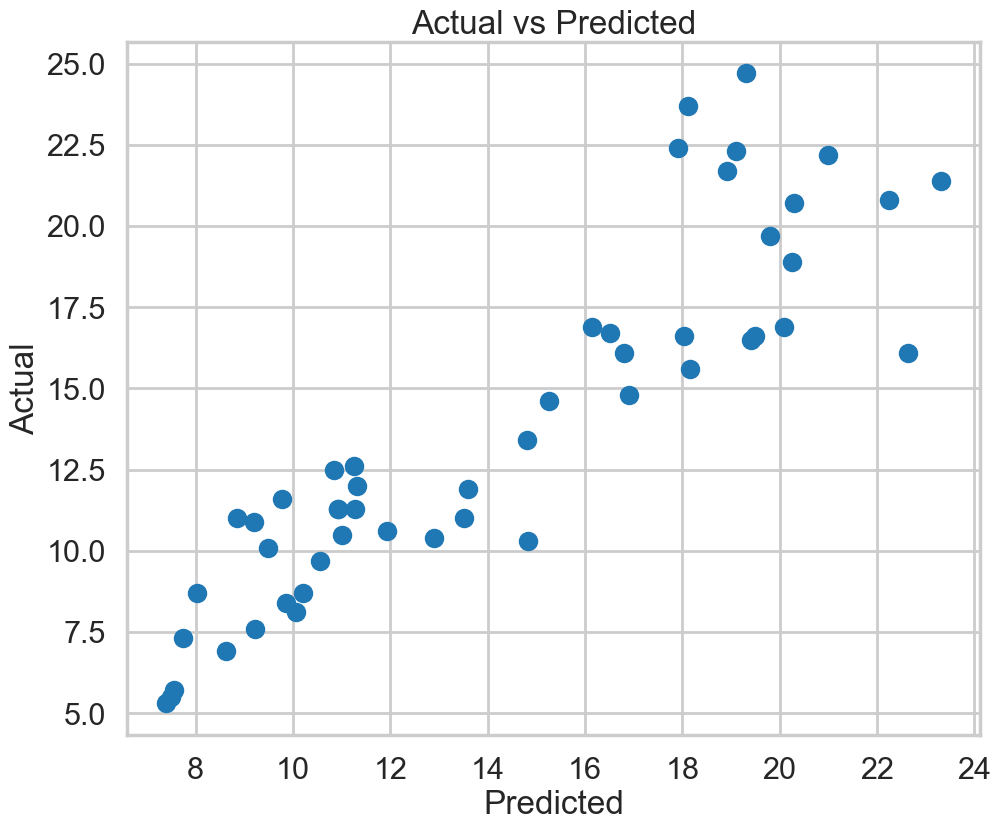

In [28]:
linreg_TV_results = linreg_model(x_train["TV"].values.reshape(-1,1), x_test["TV"].values.reshape(-1,1))

### Cross Validation
cv_score = cross_val_score(LinearRegression(), x["TV"].values.reshape(-1, 1), y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

### Compile validation results
linreg_TV_results.update({"Predictor/s":"TV", "Cross-Val Mean": cv_score.mean() * 100})

### Add the results to the dataframe
df_results = df_results.append(linreg_TV_results, ignore_index=True)

In [ ]:
linreg_TVR_results = linreg_model(x_train[["TV", "Radio"]], x_test[["TV", "Radio"]])

### Cross Validation
cv_score = cross_val_score(LinearRegression(), x[["TV", "Radio"]], y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

### Compile validation results
linreg_TVR_results.update({"Predictor/s":"TV & Radio", "Cross-Val Mean": cv_score.mean() * 100})

### Add the results to the dataframe
df_results = df_results.append(linreg_TVR_results, ignore_index=True)

In [29]:
df_results.set_index("Predictor/s", inplace = True)
df_results.head()

NameError: name 'df_results' is not defined

In [25]:
sale.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
